In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

from scipy import stats
from scipy.stats import norm, skew #for some statistics

In [2]:
train = pd.read_csv('../houseprice/train.csv')
test = pd.read_csv('../houseprice/test.csv')
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [3]:
feature_train, target = train, train.pop('SalePrice')

In [4]:
feature = pd.concat([train,test])

In [5]:
feature.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


In [6]:
#補值
feature['MSZoning'] = feature['MSZoning'].fillna('RM')
feature['Utilities'] = feature['Utilities'].fillna(feature['Utilities'].mode())
feature['Exterior1st'] = feature['Exterior1st'].fillna(feature['Exterior1st'].mode())
feature['Exterior2nd'] = feature['Exterior2nd'].fillna('Other')
feature['BsmtFinSF1'] = feature['BsmtFinSF1'].fillna(0)
feature['BsmtFinSF2'] = feature['BsmtFinSF2'].fillna(0)
feature['BsmtUnfSF'] = feature['BsmtUnfSF'].fillna(0)
feature['TotalBsmtSF'] = feature['TotalBsmtSF'].fillna(0)
feature['BsmtFullBath'] = feature['BsmtFullBath'].fillna(0)
feature['BsmtHalfBath'] = feature['BsmtHalfBath'].fillna(0)
feature['KitchenQual'] = feature['KitchenQual'].fillna('TA')
feature['Functional'] = feature['Functional'].fillna('Typ')
feature['GarageCars'] = feature['GarageCars'].fillna(0)
feature['GarageArea'] = feature['GarageArea'].fillna(0)
feature['SaleType'] = feature['SaleType'].fillna('Oth')
feature['LotFrontage'] = feature['LotFrontage'].fillna(0)
feature['Alley'] = feature['Alley'].fillna('NA')
feature['MasVnrType'] = feature['MasVnrType'].fillna('None')
feature['MasVnrArea'] = feature['MasVnrArea'].fillna(0)
feature['BsmtQual'] = feature['BsmtQual'].fillna('NA')
feature['BsmtCond'] = feature['BsmtCond'].fillna('NA')
feature['BsmtExposure'] = feature['BsmtExposure'].fillna('NA')
feature['BsmtFinType1'] = feature['BsmtFinType1'].fillna('NA')
feature['BsmtFinType2'] = feature['BsmtFinType2'].fillna('NA')
feature['Electrical'] = feature['Electrical'].fillna(feature['Electrical'].mode())
feature['FireplaceQu'] = feature['FireplaceQu'].fillna('No_Fireplace')
feature['GarageType'] = feature['GarageType'].fillna('NA')
feature['GarageYrBlt'] = feature['GarageYrBlt'].fillna(feature['YrSold'])
feature['GarageFinish'] = feature['GarageFinish'].fillna('NA')
feature['GarageQual'] = feature['GarageQual'].fillna('No_Garage') 
feature['GarageCond'] = feature['GarageCond'].fillna('No_Garage')
feature['PoolQC'] = feature['PoolQC'].fillna('No_Pool')
feature['Fence'] = feature['Fence'].fillna('NA')
feature['MiscFeature'] = feature['MiscFeature'].fillna('NA')

In [7]:
log1p_col = ['LotFrontage','LotArea','BsmtFinSF1','BsmtFinSF2','TotalBsmtSF','1stFlrSF','BsmtUnfSF',
            '2ndFlrSF','LowQualFinSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF',
            'EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal']
for col in log1p_col:
    feature[col] = feature[col].apply(np.log1p)

In [8]:
feature['Building_age'] = feature['YrSold'] - feature['YearBuilt']
for idx in feature.loc[feature.Building_age<0].index:
    feature.loc[idx, 'Building_age'] = 0
feature['Building_age_class'] = pd.cut(feature['Building_age'], bins=14)
feature['Building_age'] = feature['Building_age'].apply(np.log1p)

In [9]:
feature['Remod_age'] = feature['YrSold'] - feature['YearRemodAdd']
feature['Remod_age_class'] = pd.cut(feature['Remod_age'], bins=6)
for idx in feature.loc[feature.Remod_age<0].index:
    feature.loc[idx, 'Remod_age'] = 0
feature['Remod_age'] = feature['Remod_age'].apply(np.log1p)

In [10]:
feature['GarageYrBlt_age'] = feature['YrSold'] - feature['GarageYrBlt']
feature['GarageYrBlt_age_class'] = pd.cut(feature['GarageYrBlt_age'], bins=10)
for idx in feature.loc[feature.GarageYrBlt_age<0].index:
    feature.loc[idx, 'GarageYrBlt_age'] = 0
feature['GarageYrBlt_age'] = feature['GarageYrBlt_age'].apply(np.log1p)

In [11]:
exter_qual = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1,'Na':0,
              'No_Fireplace':0, 'No_Garage':0, 'No_Pool':0}
feature['ExterQual'] = feature['ExterQual'].map(exter_qual)
feature['ExterCond'] = feature['ExterCond'].map(exter_qual)
feature['HeatingQC'] = feature['HeatingQC'].map(exter_qual)
feature['KitchenQual'] = feature['KitchenQual'].map(exter_qual)
feature['FireplaceQu'] = feature['FireplaceQu'].map(exter_qual)
feature['GarageQual'] = feature['GarageQual'].map(exter_qual)
feature['GarageCond'] = feature['GarageCond'].map(exter_qual)
feature['PoolQC'] = feature['PoolQC'].map(exter_qual)

In [12]:
bsmt_qual = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0}
feature['BsmtQual'] = feature['BsmtQual'].map(bsmt_qual)
feature['BsmtCond'] = feature['BsmtCond'].map(bsmt_qual)

In [13]:
bsmtexposure_map = {'Gd':4, 'Av':3, 'Mn':2, 'No':1, 'NA':0}
feature['BsmtExposure'] = feature['BsmtExposure'].map(bsmtexposure_map)

In [14]:
slop_map = {'Gtl':3, 'Mod':2, 'Sev':1}
feature['LandSlope_class'] = feature['LandSlope'].map(slop_map)

In [15]:
landcounter_map = {'Lvl':4, 'Bnk':3, 'HLS':2, 'Low':1}
feature['LandContour_class'] = feature['LandContour'].map(landcounter_map)

In [16]:
utilities_map = {'AllPub':4, 'NoSewr':3, 'NoSeWa':2, 'ELO':1}
feature['Utilities_class'] = feature['Utilities'].map(utilities_map)
feature['Utilities_class'] = feature['Utilities_class'].fillna(4)

In [17]:
bsmt_FinType = {'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 'NA':0}
feature['BsmtFinType1'] = feature['BsmtFinType1'].map(bsmt_FinType)
feature['BsmtFinType2'] = feature['BsmtFinType2'].map(bsmt_FinType)


In [18]:
fence_qual = {'GdPrv':4, 'MnPrv':3, 'GdWo':2, 'MnWw':1, 'NA':0}
feature['Fence'] = feature['Fence'].map(fence_qual)

In [19]:
condition_map = {'Artery':2, 'Feedr':2, 'Norm':1, 'RRNn':2, 'RRAn':2, 'PosN':2, 'PosA':2, 'RRNe':2, 'RRAe':2}
feature['ConditionSum'] = feature['Condition2'].map(condition_map)

In [20]:
finish_map = {'Fin':3, 'RFn':2, 'Unf':1, 'NA':0}
feature['GarageFinish_class'] = feature['GarageFinish'].map(finish_map)

In [21]:
feature['MSSubClass'] = feature['MSSubClass'].astype('object')
feature['BsmtFullBath'] = feature['BsmtFullBath'].astype('object')
feature['BsmtHalfBath'] = feature['BsmtHalfBath'].astype('object')
feature['Fireplaces'] = feature['Fireplaces'].astype('object')
feature['GarageCars'] = feature['GarageCars'].astype('object')
feature['YrSold'] = feature['YrSold'].astype('object')

In [22]:
feature = pd.get_dummies(feature)

In [23]:
train_data = feature[feature.Id<=1460]
test_data = feature[feature.Id>1460]

In [24]:
target = pd.DataFrame({'SalePrice':target})
target = target.apply(np.log)

In [25]:
train_data = pd.concat([train_data,target],axis=1)

In [26]:
df = train_data
df.head()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,"GarageYrBlt_age_class_(-168.6, -137.2]","GarageYrBlt_age_class_(-137.2, -105.8]","GarageYrBlt_age_class_(-105.8, -74.4]","GarageYrBlt_age_class_(-74.4, -43.0]","GarageYrBlt_age_class_(-43.0, -11.6]","GarageYrBlt_age_class_(-11.6, 19.8]","GarageYrBlt_age_class_(19.8, 51.2]","GarageYrBlt_age_class_(51.2, 82.6]","GarageYrBlt_age_class_(82.6, 114.0]",SalePrice
0,1,4.189655,9.042040,7,5,2003,2003,196.0,4,3,...,0,0,0,0,0,1,0,0,0,12.247694
1,2,4.394449,9.169623,6,8,1976,1976,0.0,3,3,...,0,0,0,0,0,0,1,0,0,12.109011
2,3,4.234107,9.328212,7,5,2001,2002,162.0,4,3,...,0,0,0,0,0,1,0,0,0,12.317167
3,4,4.110874,9.164401,7,5,1915,1970,0.0,3,3,...,0,0,0,0,0,1,0,0,0,11.849398
4,5,4.442651,9.565284,8,5,2000,2000,350.0,4,3,...,0,0,0,0,0,1,0,0,0,12.429216


In [27]:
df, df_R = df, df.pop('SalePrice')

In [28]:
df.pop('Id');

In [29]:
df.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,...,"GarageYrBlt_age_class_(-200.314, -168.6]","GarageYrBlt_age_class_(-168.6, -137.2]","GarageYrBlt_age_class_(-137.2, -105.8]","GarageYrBlt_age_class_(-105.8, -74.4]","GarageYrBlt_age_class_(-74.4, -43.0]","GarageYrBlt_age_class_(-43.0, -11.6]","GarageYrBlt_age_class_(-11.6, 19.8]","GarageYrBlt_age_class_(19.8, 51.2]","GarageYrBlt_age_class_(51.2, 82.6]","GarageYrBlt_age_class_(82.6, 114.0]"
0,4.189655,9.042040,7,5,2003,2003,196.0,4,3,4,...,0,0,0,0,0,0,1,0,0,0
1,4.394449,9.169623,6,8,1976,1976,0.0,3,3,4,...,0,0,0,0,0,0,0,1,0,0
2,4.234107,9.328212,7,5,2001,2002,162.0,4,3,4,...,0,0,0,0,0,0,1,0,0,0
3,4.110874,9.164401,7,5,1915,1970,0.0,3,3,3,...,0,0,0,0,0,0,1,0,0,0
4,4.442651,9.565284,8,5,2000,2000,350.0,4,3,4,...,0,0,0,0,0,0,1,0,0,0


In [30]:
import re
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
df.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in df.columns.values]

In [31]:
#做testing training vaild
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df,df_R,random_state = 42, test_size=0.2)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, random_state=42, test_size=0.2)

In [32]:
# Import dataset and linear model
from sklearn import datasets, linear_model, svm
from sklearn.metrics import mean_squared_error
from xgboost import XGBClassifier
from math import sqrt


In [33]:
#Least Square Regression
lr = linear_model.LinearRegression()
lr.fit(x_train, y_train)
predict_lr = lr.predict(x_valid)
print('Linear Regression Model:')
print('\t RMSE = {:.4f}'.format(sqrt(mean_squared_error(y_valid, predict_lr))))
print('\t Training Score: {:.4f}'.format(lr.score(x_train, y_train),4))
print('\t Validation Score: {:.4f}'.format(lr.score(x_valid, y_valid),4))

Linear Regression Model:
	 RMSE = 0.1407
	 Training Score: 0.9545
	 Validation Score: 0.8800


In [34]:
#Lasso Regression
ls = linear_model.Lasso()
ls.fit(x_train, y_train)
predict_ls = ls.predict(x_valid)
print('Lasso Regression Model:')
print('\t RMSE = {:.4f}'.format(sqrt(mean_squared_error(y_valid, predict_ls))))
print('\t Training Score: {:.4f}'.format(ls.score(x_train, y_train),4))
print('\t Validation Score: {:.4f}'.format(ls.score(x_valid, y_valid),4))


Lasso Regression Model:
	 RMSE = 0.2915
	 Training Score: 0.4481
	 Validation Score: 0.4847


In [35]:
#svm
sv = svm.SVR()
sv.fit(x_train, y_train)
predict_sv = sv.predict(x_valid)
print('SVM')
print('\t RMSE = {:.4f}'.format(sqrt(mean_squared_error(y_valid, predict_sv))))
print('\t Training Score: {:.4f}'.format(sv.score(x_train, y_train),4))
print('\t Validation Score: {:.4f}'.format(sv.score(x_valid, y_valid),4))


SVM
	 RMSE = 0.3297
	 Training Score: 0.3330
	 Validation Score: 0.3408


In [36]:
#Ridge Regression
rg = linear_model.Ridge()
rg.fit(x_train, y_train)
predict_rg = rg.predict(x_valid)
print('Ridge Regression Model:')
print('\t MSE = {:.4f}'.format(sqrt(mean_squared_error(y_valid, predict_rg))))
print('\t Training Score: {:.4f}'.format(rg.score(x_train, y_train),4))
print('\t Validation Score: {:.4f}'.format(rg.score(x_valid, y_valid),4))


Ridge Regression Model:
	 MSE = 0.1374
	 Training Score: 0.9481
	 Validation Score: 0.8856


In [37]:
cv_x_data = pd.concat([x_train, x_valid])
cv_y_data = pd.concat([y_train, y_valid])

In [38]:
#挑數值化的col
numerical_col = ['LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearRemodAdd', 'MasVnrArea', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
    'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold']
df_FSS = cv_x_data[numerical_col]

<AxesSubplot:>

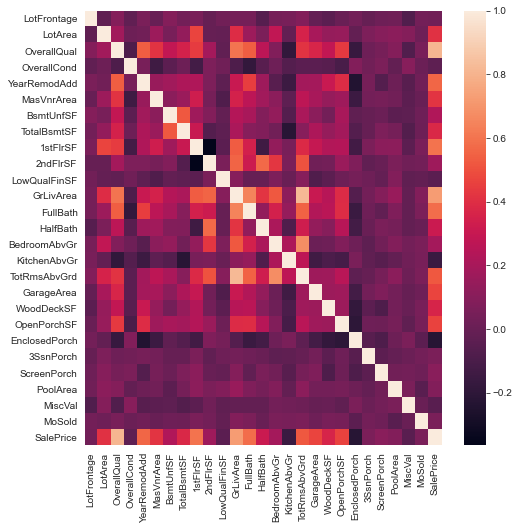

In [39]:
# 看相關係數
df_all = pd.concat([df_FSS,cv_y_data],axis=1)
plt.figure(figsize=(8,8))
sns.heatmap(df_all.corr())

In [40]:
# 相關係數排序
df_all_corr = df_all.corr()
corr = abs(df_all_corr['SalePrice']).sort_values(ascending=False)
corr = corr.drop('SalePrice')
corr

OverallQual      0.807946
GrLivArea        0.723567
1stFlrSF         0.595208
FullBath         0.583747
YearRemodAdd     0.562152
TotRmsAbvGrd     0.520082
GarageArea       0.469117
OpenPorchSF      0.461196
MasVnrArea       0.419978
LotArea          0.411305
TotalBsmtSF      0.379721
WoodDeckSF       0.362728
HalfBath         0.312282
BsmtUnfSF        0.229779
EnclosedPorch    0.225958
BedroomAbvGr     0.193340
2ndFlrSF         0.171368
KitchenAbvGr     0.157575
ScreenPorch      0.107360
PoolArea         0.084433
3SsnPorch        0.064814
MoSold           0.055651
MiscVal          0.048706
LowQualFinSF     0.040806
OverallCond      0.034448
LotFrontage      0.030891
Name: SalePrice, dtype: float64

In [41]:
#帶入col看參數對模型貢獻度
forward_predictor = pd.DataFrame()
forward_test = pd.DataFrame()
PredictorNum = []
MSE = []
training_score = []
valid_score = []

for i in range(len(corr)):
    mse_value = 0
    forward_predictor[corr.index[i]] = df_FSS[corr.index[i]]
    forward_test[corr.index[i]] = x_test[corr.index[i]]
    
    #assign model here
    model = linear_model.LinearRegression()
    model.fit(forward_predictor,cv_y_data)
    PredictorNum.append(len(forward_predictor.columns))
    mse_value = mean_squared_error(cv_y_data,model.predict(forward_predictor))
    MSE.append(sqrt(mse_value))
    training_score.append(model.score(forward_predictor,cv_y_data))
    valid_score.append(model.score(forward_test,y_test))
    print('Feature number: {}, MSE = {:.4f}'.format(i+1,mse_value))
    
mse = pd.DataFrame({'PredictorNum':PredictorNum,'MSE':MSE,
                    'Train_Score':training_score,'Test_Score':valid_score})

Feature number: 1, MSE = 0.0529
Feature number: 2, MSE = 0.0396
Feature number: 3, MSE = 0.0354
Feature number: 4, MSE = 0.0350
Feature number: 5, MSE = 0.0314
Feature number: 6, MSE = 0.0313
Feature number: 7, MSE = 0.0288
Feature number: 8, MSE = 0.0286
Feature number: 9, MSE = 0.0283
Feature number: 10, MSE = 0.0259
Feature number: 11, MSE = 0.0254
Feature number: 12, MSE = 0.0251
Feature number: 13, MSE = 0.0245
Feature number: 14, MSE = 0.0239
Feature number: 15, MSE = 0.0237
Feature number: 16, MSE = 0.0237
Feature number: 17, MSE = 0.0235
Feature number: 18, MSE = 0.0230
Feature number: 19, MSE = 0.0228
Feature number: 20, MSE = 0.0226
Feature number: 21, MSE = 0.0226
Feature number: 22, MSE = 0.0226
Feature number: 23, MSE = 0.0226
Feature number: 24, MSE = 0.0224
Feature number: 25, MSE = 0.0219
Feature number: 26, MSE = 0.0219


In [42]:
step1_target = pd.DataFrame({'linear':lr.predict(df),
                            'Ridge':rg.predict(df),
                            'SVm':sv.predict(df),
                            'Lasso':ls.predict(df),
                            'Ridge Regress':rg.predict(df)})

In [43]:
#Ensembling
xgbr = XGBClassifier(colsample_bytree=0.5,learning_rate=0.1,max_depth=5,min_child_weight=1,subsample=0.6)
xgbr.fit(step1_target, df_R)
predict_xgb = xgbr.predict(step1_target)

print('XGBoosting Regression Model:\n')
print('MSE =', sqrt(mean_squared_error(df_R, predict_xgb)))

[13:41:30] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoosting Regression Model:

MSE = 0.12078369811236069


In [44]:
test_id = test_data['Id']
test_data = test_data[test_data.columns[1:]]

In [45]:
test_step1_target = pd.DataFrame({'linear':lr.predict(test_data),
                            'Ridge':rg.predict(test_data),
                            'SVm':sv.predict(test_data),
                            'Lasso':ls.predict(test_data),
                            'Ridge Regress':rg.predict(test_data)})

In [46]:
train_data.shape

(1460, 313)

In [47]:
test_data.shape

(1459, 313)

In [48]:
predict_price = xgbr.predict(test_step1_target)
predict_price = np.expm1(predict_price)

In [49]:
submit = pd.DataFrame({'Id':test_id,'SalePrice':predict_price})
submit.to_csv('submit0507.csv', index=False)

In [50]:
import joblib
joblib.dump(xgbr,'xgbr3.pkl')

['xgbr3.pkl']